#**Laptop Dataset Model Training and Evaluation**

###This notebook is a continuation of notebooks 'Laptop_preprocessing_1.ipynb', 'Laptop_preprocessing_2.ipynb', 'Laptop_HP_scraping.ipynb', 'Laptop_preprocessing_3.ipynb'. We have completed data preprocessing operations which included data scraping, data cleaning, outlier removal etc.

###In this notebook, we will go for data visualization, label encoding, data transformation, model training, model evaluation.

In [2]:
# Importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy import stats

!pip install catboost

# Install the latest version of evidently
!pip install evidently==0.2.8
!pip install pymongo

# Import the required modules from evidently
from evidently.dashboard import Dashboard
from evidently.tabs import DataDriftTab, CatTargetDriftTab
from evidently.model_profile import Profile
from evidently.profile_sections import DataDriftProfileSection

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.2/152.2 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 60.4 MB/s eta 0:00:00
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.9.2
    Uninstalling pydantic-2.9.2:
      Successfully uninstalled pydantic-2.9.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 1.4.15 requires pydantic>=2.7.0, but you have pydantic 1.10.18 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 21.3 MB/s eta 0:00:00


###Reading dataset from github

In [ ]:
# Reading dataset
df = pd.read_csv('https://raw.githubusercontent.com/nikhil-xyz/datasets/refs/heads/main/final_df.csv')

In [ ]:
df.head()

,Brand,Screen_Size,CPU_Model,Ram,Rating,Graphics,Disk_Size,Price
0,hp,15.6,i5,16.0,4.350696,intel,512.0,69999.0
1,hp,15.6,i5,8.0,4.350696,intel,512.0,66999.0
2,hp,14.0,i3,8.0,4.350696,intel,512.0,66999.0
3,hp,16.0,ultra7,32.0,4.350696,intel,1024.0,149999.0
4,hp,14.0,ultra7,16.0,4.350696,intel,512.0,115999.0


- 'Price' is the target feature and other are predictor features.
- Since we have done the preprocessing, we know units of all the features that have been assigned to them
- Screen_Size : inch
- Ram, Disk_Size : GB
- Price : Rupees

In [ ]:
df.shape

(1507, 8)

In [ ]:
# Shuffling
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1507 entries, 0 to 1506
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        1507 non-null   object 
 1   Screen_Size  1507 non-null   float64
 2   CPU_Model    1507 non-null   object 
 3   Ram          1507 non-null   float64
 4   Rating       1507 non-null   float64
 5   Graphics     1507 non-null   object 
 6   Disk_Size    1507 non-null   float64
 7   Price        1507 non-null   float64
dtypes: float64(5), object(3)
memory usage: 94.3+ KB


- Both categrical and numerical features are available inside the dataset.

In [ ]:
df.isna().sum()

,0
Brand,0
Screen_Size,0
CPU_Model,0
Ram,0
Rating,0
Graphics,0
Disk_Size,0
Price,0


- Dataset does not have any missing value throughout all columns

In [ ]:
df.describe()

,Screen_Size,Ram,Rating,Disk_Size,Price
count,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000
mean,15.009894,14.954214,4.280930,585.170537,83844.016138
std,1.579371,11.201162,0.464107,480.720110,61833.433438
min,10.000000,2.000000,1.000000,4.000000,3196.360000
25%,14.000000,8.000000,4.200000,256.000000,36978.200000
50%,15.600000,16.000000,4.332796,512.000000,65999.000000
75%,15.600000,16.000000,4.500000,1024.000000,118818.000000
max,34.000000,64.000000,5.000000,4096.000000,299999.000000


###**Insights**
- Unusual for laptop to have screen size of 34 inch
- Unusual minimum laptop price

In [ ]:
df[df.Screen_Size > 20]

,Brand,Screen_Size,CPU_Model,Ram,Rating,Graphics,Disk_Size,Price
854,hp,34.0,i7,32.0,4.4,nvidia,512.0,177694.0


In [ ]:
df.drop(df[df.Screen_Size > 20].index, inplace=True)

In [ ]:
df[df.Price < 10000]

,Brand,Screen_Size,CPU_Model,Ram,Rating,Graphics,Disk_Size,Price
157,other,10.1,i3,4.0,4.200000,other,64.0,7379.18
272,acer,11.6,celeron,4.0,4.500000,intel,32.0,8199.18
279,hp,11.6,i3,4.0,4.400000,other,32.0,8618.20
308,acer,11.6,celeron,4.0,4.000000,intel,16.0,6559.18
334,asus,11.6,celeron,4.0,4.300000,intel,16.0,5739.18
369,samsung,11.6,celeron,4.0,4.400000,intel,16.0,3852.36
378,samsung,11.6,i3,2.0,3.700000,intel,16.0,4099.18
390,samsung,12.1,i3,2.0,3.000000,intel,16.0,6478.00
402,samsung,11.6,celeron,4.0,3.500000,intel,16.0,9430.00
452,samsung,11.6,celeron,4.0,4.400000,intel,16.0,7298.00


- All these laptops with price smaller than 10000 are small screen devices with smaller screen size and lower CPU model.
- Only devices with price smaller than 5000 should be removed.

In [ ]:
# Removing outliers
df.drop(df[df.Price < 5000].index, inplace=True)

In [ ]:
df.shape

(1498, 8)

##**Checking For Data Drift**

Data drift is the change in the statistical properties of data over time. This can negatively impact the performance of machine learning models.

In [ ]:
laptop_data_drift_dashboard = Dashboard(tabs=[DataDriftTab()])

In [ ]:
laptop_data_drift_dashboard.calculate(df[:1000], df[1000:])

In [ ]:
laptop_data_drift_dashboard.save("laptop_data_drift_report.html")

###**Seperating Predictor and Target feature**

In [ ]:
X = df.drop('Price', axis=1)
y = df['Price']
y = np.array(y)

In [ ]:
X.shape

(1498, 7)

In [ ]:
y

array([ 21238.  ,  40999.18,  38376.  , ..., 108977.18, 115619.18,
        19679.18])

###**Categorization of Features**

In [ ]:
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns
target_feature = ['Price']

In [ ]:
categorical_features

Index(['Brand', 'CPU_Model', 'Graphics'], dtype='object')

In [ ]:
numerical_features

Index(['Screen_Size', 'Ram', 'Rating', 'Disk_Size'], dtype='object')

##**Visualization and Insights For Numerical Features**
**Correlation analysis and hypothesis testing**: Correlation analysis and hypothesis testing will be conducted to identify relationships between the numerical features and the target variable ('Price').

<Axes: >

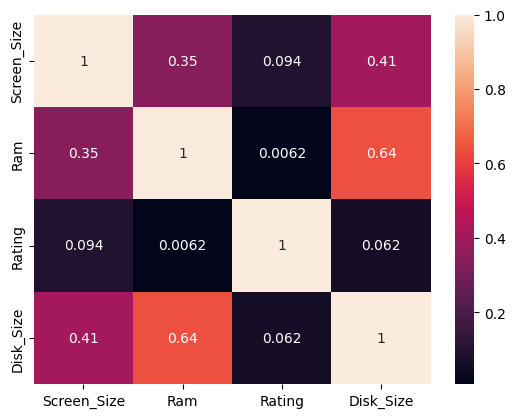

In [ ]:
sns.heatmap(df[numerical_features].corr(), annot=True)

<Axes: >

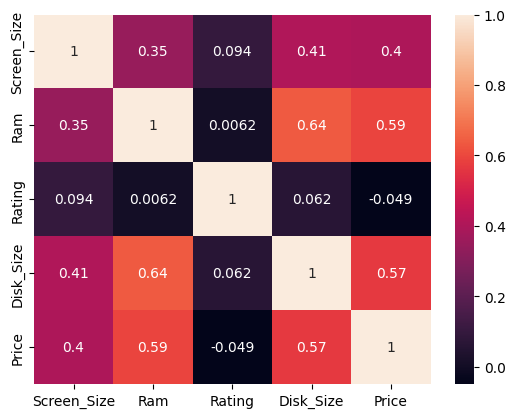

In [ ]:
sns.heatmap(df[['Screen_Size', 'Ram', 'Rating', 'Disk_Size', 'Price']].corr(), annot=True)

###Other than Rating, Screen_Size, Ram and Disk_Size are explaining slightly better than average amount of variation in the Price feature.

In [ ]:
def correlation_test(feature, target):
  """
  Calculates and prints the Pearson correlation coefficient and p-value
  between a feature and the target variable.

  Args:
    feature: The name of the feature column.
    target: The name of the target column.
  """

  pearson_coef, p_value = stats.pearsonr(df[feature], df[target])
  # print(f"{feature}: Pearson coefficient = {pearson_coef:.2f}, p-value = {p_value:.3f}")
  return p_value

# Assuming 'df', 'numerical_features', and 'target_feature' are defined
significance = []
result = []
for feature in numerical_features:
  p_value = correlation_test(feature, target_feature[0])
  significance.append(feature)
  if p_value < 0.05:
    result.append('Reject Null Hypothesis')
  else:
    result.append('Failed to reject Null Hypothesis')

pd.DataFrame({'Feature': significance, 'Result': result})



,Feature,Result
0,Screen_Size,Reject Null Hypothesis
1,Ram,Reject Null Hypothesis
2,Rating,Failed to reject Null Hypothesis
3,Disk_Size,Reject Null Hypothesis


###**Insights**
- Since the rating feature is not showing any significance with the target feature, it will be logical to remove it.

In [ ]:
# Droping Rating feature
X.drop('Rating', axis=1, inplace=True)

In [ ]:
numerical_features = X.select_dtypes(exclude=['object']).columns

In [ ]:
numerical_features

Index(['Screen_Size', 'Ram', 'Disk_Size'], dtype='object')

**KDE Plots**

The KDE plots for numerical features (Screen Size, Ram, and Disk Size) will show that the distributions are either left or right skewed. To address this, a Yeo-Johnson power transformation was applied to make the data more Gaussian-like. This transformation helps to stabilize variance and improve the performance of machine learning algorithms.

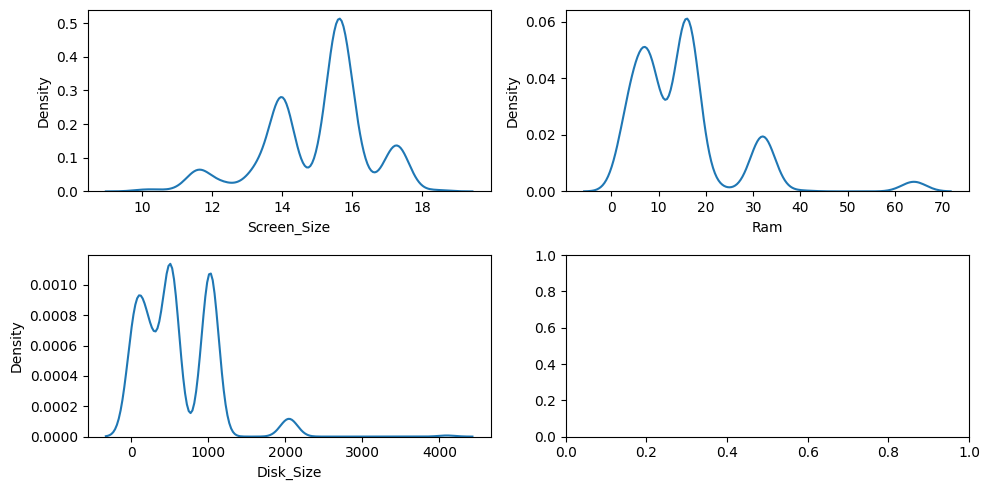

In [ ]:
# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over numerical features and plot on subplots
for i, feature in enumerate(numerical_features):
  sns.kdeplot(df[feature], ax=axes[i])

# Display the plot
plt.tight_layout()
plt.show()

###**Insights**
- All the numerical features are either left skewed or right skewed except Screen_Size
- Apply a power transform featurewise to make data more Gaussian-like.
- Power transformation is a technique used to stabilize variance and make data more normal distribution-like.
- Currently, PowerTransformer supports the Box-Cox transform and the Yeo-Johnson transform.

###**Checking Skewness**
Skewness is a measure of the asymmetry of a distribution. A distribution can have right (or positive), left (or negative), or zero skewness.

Right skewed distributions have a longer tail on the right side of the mean.
Left skewed distributions have a longer tail on the left side of the mean.
Distributions with zero skewness are symmetrical.
Skewness can be detected visually or by calculating the skewness coefficient.

In [ ]:
# Check Skewness
df[numerical_features].skew(axis=0, skipna=True)

,0
Screen_Size,-0.645165
Ram,2.091448
Disk_Size,1.581128


- Positively Skewed Features : Ram, Disk_size
- Negatively Skewed Features : Screen_Size, Rating

###**Applying Power Transformer to reduce skewness and handle outliers**

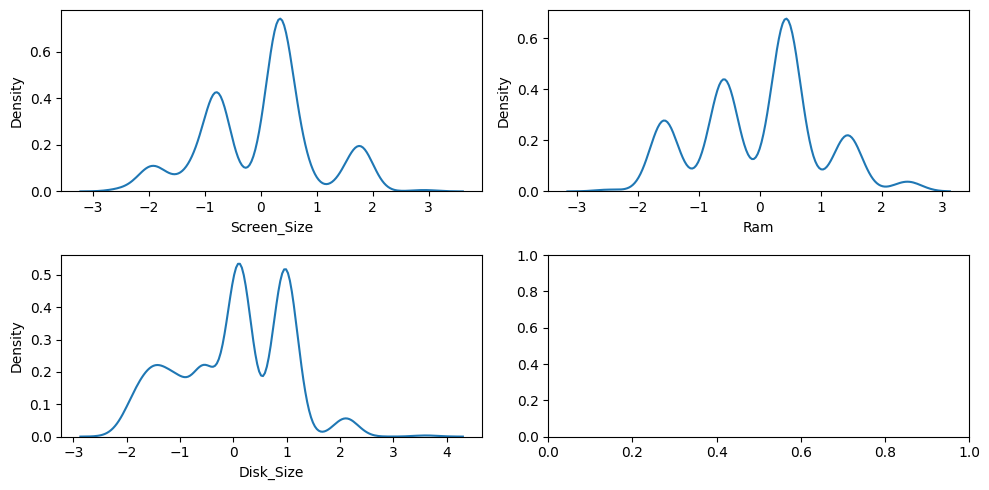

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
X_copy = pt.fit_transform(df[numerical_features])
X_copy = pd.DataFrame(X_copy, columns=numerical_features)

# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over numerical features and plot on subplots
for i, feature in enumerate(numerical_features):
  sns.kdeplot(X_copy[feature], ax=axes[i])

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Check Skewness
X_copy[numerical_features].skew(axis=0, skipna=True)

,0
Screen_Size,-0.031073
Ram,0.007436
Disk_Size,-0.128475


- Transformation has reduced skewness

##**Visualization and Insights For Categorical Features**

In [ ]:
for feature in categorical_features:
  print('{}'.format(df[feature].value_counts()))
  print('\n')

Brand
hp             401
asus           242
acer           185
msi            135
dell           129
samsung         77
alienware       62
excaliberpc     55
microsoft       53
lg              52
other           44
gigabyte        25
lenovo          21
panasonic        8
toughbook        5
chuwi            4
Name: count, dtype: int64


CPU_Model
i7         469
i5         295
i3         243
celeron    190
ryzen7      76
ryzen5      71
i9          43
ryzen3      36
ultra7      32
ryzen9      30
ultra5       8
ultra9       5
Name: count, dtype: int64


Graphics
intel     791
nvidia    457
amd       178
other      72
Name: count, dtype: int64




###**Insights**
- Brand feature has some entries where value count is less than 10.
- All such entries can be combined together.

In [ ]:
df_brand = df.Brand.value_counts()
df_brand[df_brand < 10]

,count
Brand,
panasonic,8
toughbook,5
chuwi,4


In [ ]:
df.loc[df['Brand'].isin(df_brand[df_brand < 10].index), 'Brand'] = 'other'

In [ ]:
df.Brand.value_counts()

,count
Brand,
hp,401
asus,242
acer,185
msi,135
dell,129
samsung,77
alienware,62
other,61
excaliberpc,55


In [ ]:
# Unique groups for categorical features
for feature in categorical_features:
    print(feature,':', df[feature].nunique())

Brand : 13
CPU_Model : 12
Graphics : 4


###**Significance Test**
**Significance Test**: A significance test is a statistical method used to determine if there is enough evidence to reject the null hypothesis. The null hypothesis is a statement that there is no difference between two groups or no relationship between two variables.

The p-value is the probability of observing the data if the null hypothesis were true. A small p-value (typically less than 0.05) indicates that the data is unlikely to have occurred by chance, and the null hypothesis is rejected.

###Since, all the categorical feature have more than 3 group for each category, one way anova is suitable hypothesis test.

In [ ]:
def anova_test(df, feature, target):
  """
  Performs a one-way ANOVA test between a categorical feature and a continuous target.

  Args:
    df: DataFrame containing the data.
    feature: Name of the categorical feature column.
    target: Name of the continuous target column.

  Returns:
    A tuple containing the F-statistic and p-value.
  """
  groups = df[feature].unique()
  samples = [df[df[feature] == g][target] for g in groups]
  f_statistic, p_value = stats.f_oneway(*samples)
  return f_statistic, p_value

significance = []
result = []

for feature in categorical_features:
  f_statistic, p_value = anova_test(df, feature, target_feature)
  significance.append(feature)
  if p_value < 0.05:
    result.append('Reject Null Hypothesis')
  else:
    result.append('Failed to reject Null Hypothesis')

pd.DataFrame({'Feature': significance, 'Result': result})

,Feature,Result
0,Brand,Reject Null Hypothesis
1,CPU_Model,Reject Null Hypothesis
2,Graphics,Reject Null Hypothesis


- All categorical features are showing significance with the target.

**Box Plots**: Box plots are a way to visualize the distribution of data. They show the median, quartiles, and outliers of a dataset. They can be used to compare the distribution of different groups of data.

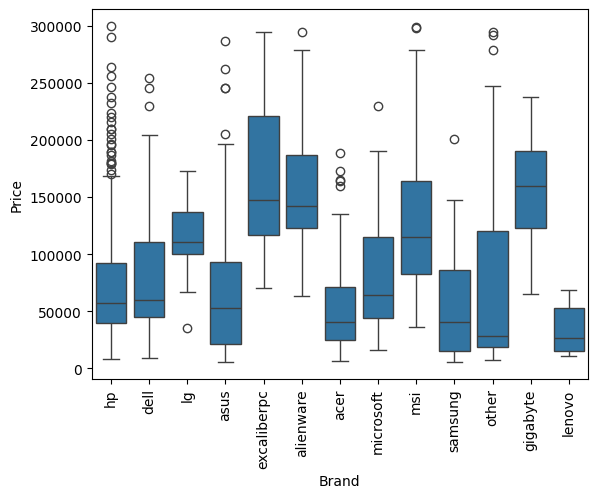

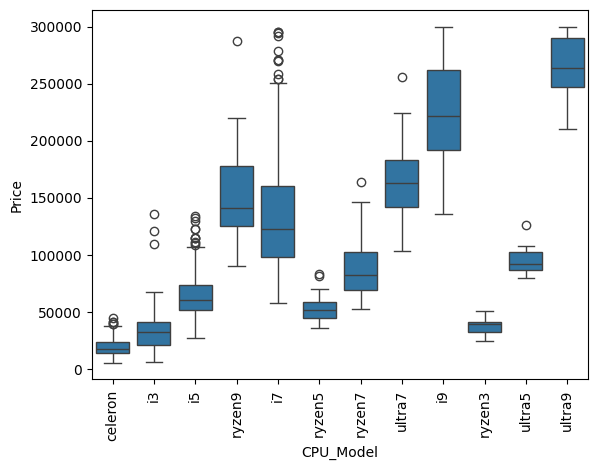

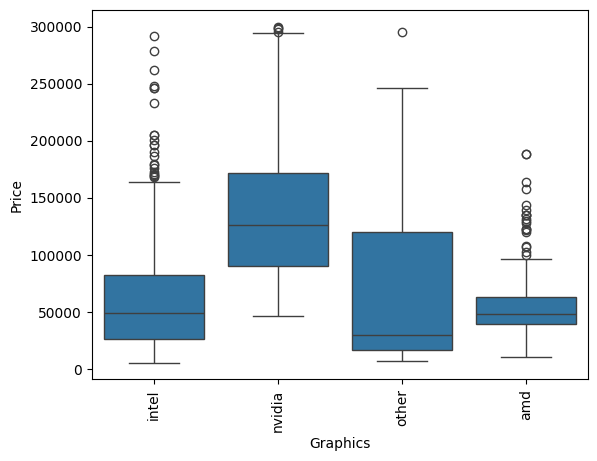

In [ ]:
for feature in categorical_features:
  sns.boxplot(x=feature, y=target_feature[0], data=df)
  plt.xticks(rotation=90)
  plt.show()

<Axes: ylabel='Density'>

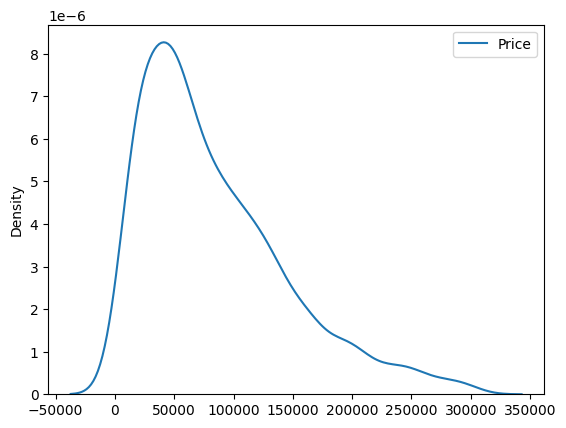

In [ ]:
sns.kdeplot(df[target_feature])

###Laptop prices are more likely normally distributed

###**Preprocessing Operations**

###preprocessing techniques Required:

**OneHotEncoder**: Used to encode categorical features into numerical ones by creating new binary columns for each unique category.

**PowerTransformer**: Applies a power transformation to numerical features to make their distribution more Gaussian-like. This can improve the performance of machine learning algorithms that assume normality.

**StandardScaler**: Standardizes numerical features by subtracting the mean and dividing by the standard deviation, resulting in features with zero mean and unit variance. This helps to ensure that features with different scales do not disproportionately influence the model.

**ColumnTransformer**: ColumnTransformer is a scikit-learn class used to apply different transformers to different columns of a dataset. You can specify different transformers for numerical and categorical data, making it useful for heterogeneous datasets. This helps streamline the data preprocessing steps and ensures that each feature type is handled appropriately.

In [ ]:
X = df.drop('Price', axis=1)
y = df['Price']
y = np.array(y)

In [ ]:
# Create Column Transformer with 3 types of transformers
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

transform_pipe = Pipeline(steps=[
    ('transformer', PowerTransformer(method='yeo-johnson'))
])

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, categorical_features),
        ("Transformer", transform_pipe, numerical_features),
        ("StandardScaler", numeric_transformer, numerical_features)
    ]
)

In [ ]:
X = preprocessor.fit_transform(X)

In [ ]:
X.shape

(1498, 35)

###Importing all the available Regression Algorithms and evaluation matrics

In [ ]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [ ]:
def evaluate_regression(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    r2_ = r2_score(true, predicted)
    return mae, mse, r2_

In [ ]:
models = {
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Linear Regression': LinearRegression(),
    'XGBoost': XGBRegressor(),
    'CatBoost': CatBoostRegressor(verbose=False),
    'AdaBoost': AdaBoostRegressor(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'KNN Regressor': KNeighborsRegressor()
}

In [ ]:
# Create a function which can evaluate models and return a report
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=40)

    models_list = []
    r2_list = []

    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_test_pred = model.predict(X_test)

        # Training set performance
        mae, mse, r2_ = evaluate_regression(y_test ,y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])
        r2_list.append(r2_)

        print("- Root Mean Squared Error: {:.4f}".format(np.sqrt(mse)))
        print("- Mean Absolute Error: {:.4f}".format(mae))
        print("- R2 Score: {:.4f}".format(r2_))

        print('----------------------------------')


    report = pd.DataFrame(list(zip(models_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=['R2_Score'], ascending=False)

    return report

In [ ]:
base_model_report = evaluate_models(X = X, y = y, models=models)

Decision Tree
- Root Mean Squared Error: 27145.4993
- Mean Absolute Error: 16998.4944
- R2 Score: 0.8132
----------------------------------
Random Forest
- Root Mean Squared Error: 25430.0711
- Mean Absolute Error: 15488.2946
- R2 Score: 0.8361
----------------------------------
Gradient Boosting
- Root Mean Squared Error: 27900.0686
- Mean Absolute Error: 18077.8542
- R2 Score: 0.8027
----------------------------------
Linear Regression
- Root Mean Squared Error: 28651.7334
- Mean Absolute Error: 19378.9631
- R2 Score: 0.7919
----------------------------------
XGBoost
- Root Mean Squared Error: 25197.9516
- Mean Absolute Error: 16066.6339
- R2 Score: 0.8390
----------------------------------
CatBoost
- Root Mean Squared Error: 25378.9775
- Mean Absolute Error: 15785.0880
- R2 Score: 0.8367
----------------------------------
AdaBoost
- Root Mean Squared Error: 42012.3217
- Mean Absolute Error: 36273.5350
- R2 Score: 0.5525
----------------------------------
Ridge
- Root Mean Squared Er

In [ ]:
base_model_report

,Model Name,R2_Score
4,XGBoost,0.839034
5,CatBoost,0.836713
1,Random Forest,0.836055
0,Decision Tree,0.813190
2,Gradient Boosting,0.802660
7,Ridge,0.792177
8,Lasso,0.791893
3,Linear Regression,0.791884
9,KNN Regressor,0.766015
6,AdaBoost,0.552537


In [ ]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((1198, 35), (300, 35))

**Feature Importance**

Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.

In [ ]:
temp_model = CatBoostRegressor(verbose=False)
temp_model.fit(X_train, y_train)
y_pred = temp_model.predict(X_test)

In [ ]:
# Assuming you have trained a model named 'model' (e.g., XGBRegressor, CatBoostRegressor)

# Get feature importances
importances = temp_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame({'Feature': preprocessor.get_feature_names_out(), 'Importance': importances})

# Sort feature importances in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print(feature_importances)

                             Feature  Importance
16       OneHotEncoder__CPU_Model_i7   17.513414
27    OneHotEncoder__Graphics_nvidia   13.233216
30                  Transformer__Ram    8.251255
17       OneHotEncoder__CPU_Model_i9    7.836922
33               StandardScaler__Ram    6.407082
31            Transformer__Disk_Size    6.018182
34         StandardScaler__Disk_Size    6.016426
32       StandardScaler__Screen_Size    5.707337
29          Transformer__Screen_Size    4.153142
11        OneHotEncoder__Brand_other    3.233921
23   OneHotEncoder__CPU_Model_ultra7    2.690544
15       OneHotEncoder__CPU_Model_i5    2.050949
14       OneHotEncoder__CPU_Model_i3    1.812109
26     OneHotEncoder__Graphics_intel    1.641463
1     OneHotEncoder__Brand_alienware    1.475093
21   OneHotEncoder__CPU_Model_ryzen9    1.279827
4   OneHotEncoder__Brand_excaliberpc    1.185940
28     OneHotEncoder__Graphics_other    1.117916
13  OneHotEncoder__CPU_Model_celeron    1.078407
24   OneHotEncoder__

**Random Search CV**

RandomizedSearchCV is a technique used for hyperparameter tuning in machine learning. It randomly samples a subset of hyperparameter combinations from a specified distribution, rather than exhaustively searching through all possible combinations like GridSearchCV. This makes it more efficient, especially when the hyperparameter search space is large.

In [ ]:
#Initialize few parameter for Hyperparamter tuning
catboost_params = {
    'iterations': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'depth': [4, 6, 8, 10],
}

xgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'max_depth': [4, 6, 8],
}

gradient_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'max_depth': [4, 6, 8],
}

ridge_params = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0],
}

lasso_params = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0],
}

In [ ]:
# Models list for Hyperparameter tuning
randomcv_models = [
    ('CatBoost', CatBoostRegressor(verbose=False), catboost_params),
    ('XGBoost', XGBRegressor(), xgb_params),
    ('Gradient Boosting', GradientBoostingRegressor(), gradient_params),
    ('Ridge', Ridge(), ridge_params),
    ('Lasso', Lasso(), lasso_params)
]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=4,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X, y)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 4 folds for each of 64 candidates, totalling 256 fits
Fitting 4 folds for each of 36 candidates, totalling 144 fits
Fitting 4 folds for each of 36 candidates, totalling 144 fits
Fitting 4 folds for each of 6 candidates, totalling 24 fits
Fitting 4 folds for each of 6 candidates, totalling 24 fits
---------------- Best Params for CatBoost -------------------
{'learning_rate': 0.1, 'iterations': 400, 'depth': 4}
---------------- Best Params for XGBoost -------------------
{'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.1}
---------------- Best Params for Gradient Boosting -------------------
{'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.1}
---------------- Best Params for Ridge -------------------
{'alpha': 0.1}
---------------- Best Params for Lasso -------------------
{'alpha': 10.0}


In [ ]:
model_param

{'CatBoost': {'learning_rate': 0.1, 'iterations': 400, 'depth': 4},
 'XGBoost': {'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.1},
 'Gradient Boosting': {'n_estimators': 200,
  'max_depth': 4,
  'learning_rate': 0.1},
 'Ridge': {'alpha': 0.1},
 'Lasso': {'alpha': 10.0}}

In [ ]:
best_models = {
    'CatBoost': CatBoostRegressor(verbose=False, **model_param['CatBoost']),
    'XGBoost': XGBRegressor(**model_param['XGBoost']),
    'Gradient Boosting': GradientBoostingRegressor(**model_param['Gradient Boosting']),
    'Ridge': Ridge(**model_param['Ridge']),
    'Lasso': Lasso(**model_param['Lasso'])
}
tuned_report = evaluate_models(X = X, y = y, models=best_models)

CatBoost
- Root Mean Squared Error: 25281.1328
- Mean Absolute Error: 16094.7788
- R2 Score: 0.8380
----------------------------------
XGBoost
- Root Mean Squared Error: 25617.6261
- Mean Absolute Error: 16346.1060
- R2 Score: 0.8336
----------------------------------
Gradient Boosting
- Root Mean Squared Error: 26362.5773
- Mean Absolute Error: 16655.8465
- R2 Score: 0.8238
----------------------------------
Ridge
- Root Mean Squared Error: 28650.1842
- Mean Absolute Error: 19368.2415
- R2 Score: 0.7919
----------------------------------
Lasso
- Root Mean Squared Error: 28647.2974
- Mean Absolute Error: 19321.0101
- R2 Score: 0.7919
----------------------------------


In [ ]:
df.head()

,Brand,Screen_Size,CPU_Model,Ram,Rating,Graphics,Disk_Size,Price
0,hp,14.0,celeron,4.0,4.4,intel,64.0,21238.00
1,dell,15.6,i3,16.0,3.8,intel,1024.0,40999.18
2,hp,15.6,i5,12.0,4.5,intel,512.0,38376.00
3,hp,16.1,ryzen9,32.0,4.5,nvidia,1024.0,179999.00
4,lg,16.0,i7,16.0,4.4,intel,1024.0,110682.78


###**Creating MongoDB account and pushing the dataset over there**

MongoDB is a popular NoSQL database. It stores data in flexible, JSON-like documents. This makes it great for handling data that doesn't fit neatly into traditional rows and columns.

It's known for being scalable and easy to use, especially for developers working with data that changes frequently.

In [ ]:
!pip install "pymongo[srv]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 31.2 MB/s eta 0:00:00


###Converting dataframe to collection

In [ ]:
data = df.to_dict(orient="records")

In [ ]:
data[0]

{'Brand': 'hp',
 'Screen_Size': 14.0,
 'CPU_Model': 'celeron',
 'Ram': 4.0,
 'Rating': 4.4,
 'Graphics': 'intel',
 'Disk_Size': 64.0,
 'Price': 21238.0}

In [ ]:
DB_NAME = "Laptop"
COLLECTION_NAME = "laptop_data"

In [4]:
import os
from pymongo.mongo_client import MongoClient
from pymongo.server_api import ServerApi

uri = os.getenv('MONGODB_URI')

# Create a new client and connect to the server
client = MongoClient(uri, server_api=ServerApi('1'))

# Send a ping to confirm a successful connection
try:
    client.admin.command('ping')
    print("Pinged your deployment. You successfully connected to MongoDB!")
except Exception as e:
    print(e)

localhost:27017: [Errno 111] Connection refused (configured timeouts: socketTimeoutMS: 20000.0ms, connectTimeoutMS: 20000.0ms), Timeout: 30s, Topology Description: <TopologyDescription id: 6700e52d9cc58582540aa5d6, topology_type: Unknown, servers: [<ServerDescription ('localhost', 27017) server_type: Unknown, rtt: None, error=AutoReconnect('localhost:27017: [Errno 111] Connection refused (configured timeouts: socketTimeoutMS: 20000.0ms, connectTimeoutMS: 20000.0ms)')>]>


In [ ]:
data_base = client[DB_NAME]
collection = data_base[COLLECTION_NAME]

rec = collection.insert_many(data)

In [ ]:
records = collection.find()
records

In [ ]:
for i, j in enumerate(records):
    print(f"{i}: {j}")

0: {'_id': ObjectId('66fcb39b01fe99bdf405e3af'), 'Brand': 'hp', 'Screen_Size': 14.0, 'CPU_Model': 'celeron', 'Ram': 4.0, 'Rating': 4.4, 'Graphics': 'intel', 'Disk_Size': 64.0, 'Price': 21238.0}
1: {'_id': ObjectId('66fcb39b01fe99bdf405e3b0'), 'Brand': 'dell', 'Screen_Size': 15.6, 'CPU_Model': 'i3', 'Ram': 16.0, 'Rating': 3.8, 'Graphics': 'intel', 'Disk_Size': 1024.0, 'Price': 40999.18}
2: {'_id': ObjectId('66fcb39b01fe99bdf405e3b1'), 'Brand': 'hp', 'Screen_Size': 15.6, 'CPU_Model': 'i5', 'Ram': 12.0, 'Rating': 4.5, 'Graphics': 'intel', 'Disk_Size': 512.0, 'Price': 38376.0}
3: {'_id': ObjectId('66fcb39b01fe99bdf405e3b2'), 'Brand': 'hp', 'Screen_Size': 16.1, 'CPU_Model': 'ryzen9', 'Ram': 32.0, 'Rating': 4.5, 'Graphics': 'nvidia', 'Disk_Size': 1024.0, 'Price': 179999.0}
4: {'_id': ObjectId('66fcb39b01fe99bdf405e3b3'), 'Brand': 'lg', 'Screen_Size': 16.0, 'CPU_Model': 'i7', 'Ram': 16.0, 'Rating': 4.4, 'Graphics': 'intel', 'Disk_Size': 1024.0, 'Price': 110682.78}
5: {'_id': ObjectId('66fcb39

In [ ]:
df = pd.DataFrame(list(collection.find()))
df.head()

,_id,Brand,Screen_Size,CPU_Model,Ram,Rating,Graphics,Disk_Size,Price
0,66fcb39b01fe99bdf405e3af,hp,14.0,celeron,4.0,4.4,intel,64.0,21238.00
1,66fcb39b01fe99bdf405e3b0,dell,15.6,i3,16.0,3.8,intel,1024.0,40999.18
2,66fcb39b01fe99bdf405e3b1,hp,15.6,i5,12.0,4.5,intel,512.0,38376.00
3,66fcb39b01fe99bdf405e3b2,hp,16.1,ryzen9,32.0,4.5,nvidia,1024.0,179999.00
4,66fcb39b01fe99bdf405e3b3,lg,16.0,i7,16.0,4.4,intel,1024.0,110682.78


###We have finished and tested all the notebook operations. Time for the modular coding now.